In [1]:

import fastai
print(fastai.__version__)

2.7.12


In [2]:
from fastai.vision.all import *

In [3]:
path=untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/home/codespace/.fastai/data/mnist_sample/labels.csv'),Path('/home/codespace/.fastai/data/mnist_sample/train'),Path('/home/codespace/.fastai/data/mnist_sample/valid')]

In [4]:
(path/'/home/codespace/.fastai/data/mnist_sample/train').ls()

(#2) [Path('/home/codespace/.fastai/data/mnist_sample/train/3'),Path('/home/codespace/.fastai/data/mnist_sample/train/7')]

In [5]:
threes=(path/'/home/codespace/.fastai/data/mnist_sample/train'/'3').ls().sorted()
threes

(#6131) [Path('/home/codespace/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10091.png')...]

In [6]:
sevens=(path/'/home/codespace/.fastai/data/mnist_sample/train'/'7').ls().sorted()
sevens

(#6265) [Path('/home/codespace/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10086.png')...]

In [7]:
img3_path=threes[1]
img3=Image.open(img3_path)
img3

In [8]:
array(img3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
tensor(img3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
img3_t=tensor(img3)
df=pd.DataFrame(img3_t[4:30,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [11]:
width,height=img3.size
print(width,height)

28 28


In [12]:
three_tensors=[tensor(Image.open(o)) for o in threes]
seven_tensors=[tensor(Image.open(o)) for o in sevens]
print(len(three_tensors),len(seven_tensors))

6131 6265


In [13]:
Image.open(threes[1])



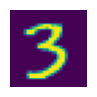

In [14]:
#as the Images stored in tensor open three_tensors using show_image

show_image(three_tensors[1]);

In [15]:
#stacked seven_tesnors using  

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [16]:
# going to find length of stacked_threes   
len(stacked_sevens.shape)

3

In [17]:
stacked_threes.ndim

3

<Axes: >

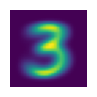

In [18]:
mean3=stacked_threes.mean(axis=0)
show_image(mean3)

<Axes: >

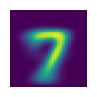

In [19]:
mean7=stacked_sevens.mean(axis=0)
show_image(mean7)

<Axes: >

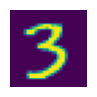

In [20]:
a_3=stacked_threes[1]
show_image(a_3)

In [21]:
dist_3_abs=abs(a_3-mean3).mean()
dist_3_sqrt=((a_3-mean3)**2).mean().sqrt()
dist_3_sqrt, dist_3_abs

(tensor(0.2021), tensor(0.1114))

<Axes: >

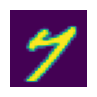

In [22]:
a_7=stacked_sevens[1]
show_image(a_7)

In [23]:
dist_7_abs=(a_7-mean7).abs().mean()
dist_7_sqrt=((a_7-mean7)**2).mean().sqrt()
dist_7_sqrt,dist_7_abs

(tensor(0.2585), tensor(0.1304))

In [24]:
dis=(a_3-mean7).abs().mean()
dist=((a_3-mean7)**2).abs().mean().sqrt()
dis, dist

(tensor(0.1586), tensor(0.3021))

In [25]:
data= [[1,2,3],[4,5,6]]
arr=array(data)
tns=tensor(arr)



In [26]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [28]:
tns[0],tns[1]

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [29]:
tns[:,0],tns[:,1],tns[:,2]

(tensor([1, 4]), tensor([2, 5]), tensor([3, 6]))

In [30]:
tns[0,1:3],tns[1,1:3]

(tensor([2, 3]), tensor([5, 6]))

In [31]:
tns+1


tensor([[2, 3, 4],
        [5, 6, 7]])

In [32]:
tns.type()

'torch.LongTensor'

In [33]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [34]:
(tns*1.5).type()

'torch.FloatTensor'

In [35]:
valid_3_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens=valid_3_tens.float()/255


In [36]:
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [37]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)


tensor(0.1114)

In [38]:
mean3.shape

torch.Size([28, 28])

In [39]:
valid_3_dist=mnist_distance(valid_3_tens,mean3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1198, 0.1165, 0.1141,  ..., 0.1591, 0.1210, 0.1465]),
 torch.Size([1010]))

Broadcasting in pytorch. Automatci expansion of smaller rank tensor to same size of larger rank while performing operations on tensor

In [40]:
tensor([1,2,3])+tensor([1])

tensor([2, 3, 4])

In [41]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [42]:
def is_3(x):
    return mnist_distance(x,mean3)<mnist_distance(x,mean7)


In [43]:
is_3(a_3),is_3(a_3).float()

(tensor(True), tensor(1.))

In [44]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [45]:
accuracy_3s= is_3(valid_3_tens).float().mean()
accuracy_7s= 1-is_3(valid_7_tens).float().mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

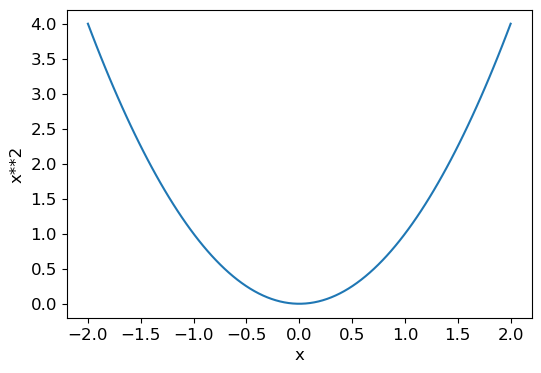

In [46]:
import fastbook
from fastbook import *
def f(x):
    return x**2

plot_function(f,'x','x**2')

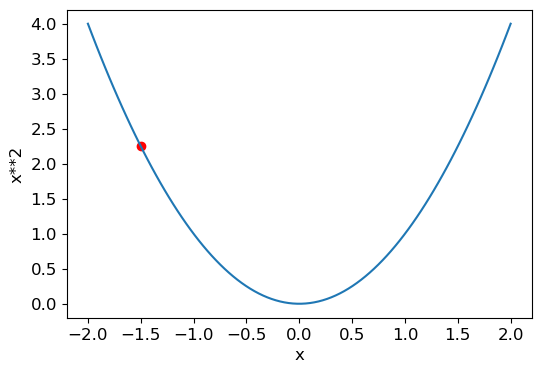

In [47]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [51]:
xt=tensor(3.).requires_grad_()

In [52]:
yt=f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [53]:
yt.backward()

In [54]:
xt.grad

tensor(6.)

In [73]:
x=tensor(2.).requires_grad_()
b=f(x)

In [74]:
b.backward()
x.grad

tensor(4.)